In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df = pd.read_csv("properties_medellin.csv")
display(df)

,Unnamed: 0,Habitaciones,Baños,Estrato,Antiguedad,Piso N°,Administración,Precio m2,Parqueaderos,Estado,Tipo de apartamento,Precio,Area construida (m2),Area privada (m2)
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240000000,NaN,NaN
1,1,1.0,2.0,4.0,1 a 8 años,3,No definida,"$ 4.032.258,06*m²",NaN,NaN,NaN,250000000,62,62
2,2,1.0,2.0,6.0,9 a 15 años,NaN,No definida,"$ 6.428.571,43*m²",2.0,NaN,NaN,675000000,105,0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647307563,NaN,NaN
4,4,1.0,1.0,5.0,NaN,3,$ 167.000 COP,$ 4.700.000*m²,2.0,NaN,NaN,235000000,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,425,3.0,1.0,3.0,1 a 8 años,16,$ 160.000 COP,"$ 3.541.666,67*m²",1.0,Excelente,NaN,170000000,48,48
426,426,3.0,3.0,4.0,9 a 15 años,5,$ 300.000 COP,"$ 4.429.347,83*m²",1.0,Excelente,NaN,407500000,92,92
427,427,2.0,1.0,4.0,9 a 15 años,15,$ 140.000 COP,"$ 3.928.571,43*m²",NaN,Excelente,NaN,165000000,42,42
428,428,3.0,2.0,4.0,16 a 30 años,3,$ 110.000 COP,"$ 5.266.666,67*m²",1.0,Excelente,NaN,395000000,75,75


In [31]:
## Drop rows with missing values on specified columns
df = df.dropna(subset="Habitaciones")
df = df.dropna(subset="Baños")
df = df.dropna(subset="Estrato")
df = df.dropna(subset="Precio m2")
df = df.dropna(subset="Area construida (m2)")

## Convert strings into floats
df["Estrato"] = df["Estrato"].astype(int)
df["Precio m2"] = df["Precio m2"].apply(lambda row: float(row[2:-3].replace(".","").replace(",",".")))
df["Area construida (m2)"] = df["Area construida (m2)"].apply(lambda row: float(row.replace(",",".")))

## Convert prices into millions
df["Precio m2"] = df["Precio m2"].apply(lambda row: round(row/1e6,2))
df["Precio"] = df["Precio"].apply(lambda row: round(row/1e6,2))

## Remove outliers
lower_percentile = df['Habitaciones'].quantile(0.01)
upper_percentile = df['Habitaciones'].quantile(0.99)
df = df[(df['Habitaciones'] >= lower_percentile) & (df['Habitaciones'] <= upper_percentile)]

lower_percentile = df['Precio m2'].quantile(0.01)
upper_percentile = df['Precio m2'].quantile(0.99)
df = df[(df['Precio m2'] >= lower_percentile) & (df['Precio m2'] <= upper_percentile)]

lower_percentile = df['Precio'].quantile(0.01)
upper_percentile = df['Precio'].quantile(0.99)
df = df[(df['Precio'] >= lower_percentile) & (df['Precio'] <= upper_percentile)]

lower_percentile = df['Area construida (m2)'].quantile(0.01)
upper_percentile = df['Area construida (m2)'].quantile(0.99)
df = df[(df['Area construida (m2)'] >= lower_percentile) & (df['Area construida (m2)'] <= upper_percentile)]

df = df[["Habitaciones", "Baños", "Estrato", "Precio m2", "Precio", "Area construida (m2)"]]

display(df)

,Habitaciones,Baños,Estrato,Precio m2,Precio,Area construida (m2)
1,1.0,2.0,4,4.03,250.0,62.0
2,1.0,2.0,6,6.43,675.0,105.0
4,1.0,1.0,5,4.70,235.0,50.0
5,1.0,1.0,4,6.19,198.0,32.0
7,2.0,2.0,6,7.42,475.0,64.0
...,...,...,...,...,...,...
425,3.0,1.0,3,3.54,170.0,48.0
426,3.0,3.0,4,4.43,407.5,92.0
427,2.0,1.0,4,3.93,165.0,42.0
428,3.0,2.0,4,5.27,395.0,75.0


<Axes: xlabel='Estrato', ylabel='Precio'>

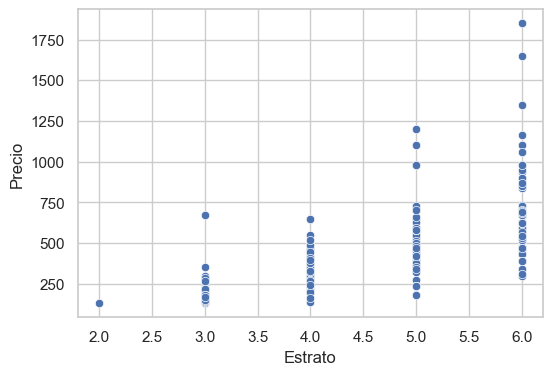

In [32]:
plt.figure(figsize=(6,4))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df[df["Precio"] < 1e12], x="Estrato", y="Precio")

<Axes: xlabel='Estrato', ylabel='Precio m2'>

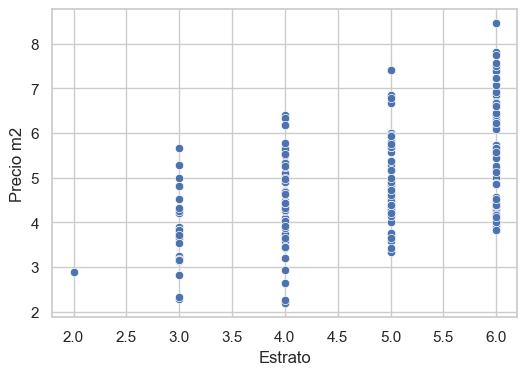

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Estrato", y="Precio m2")

C:\Users\alejo\AppData\Local\Temp\ipykernel_9276\1521282272.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(data=df, x="Area construida (m2)", y="Precio m2", hue="Estrato", palette=sns.color_palette("icefire"), s=100)


[None]

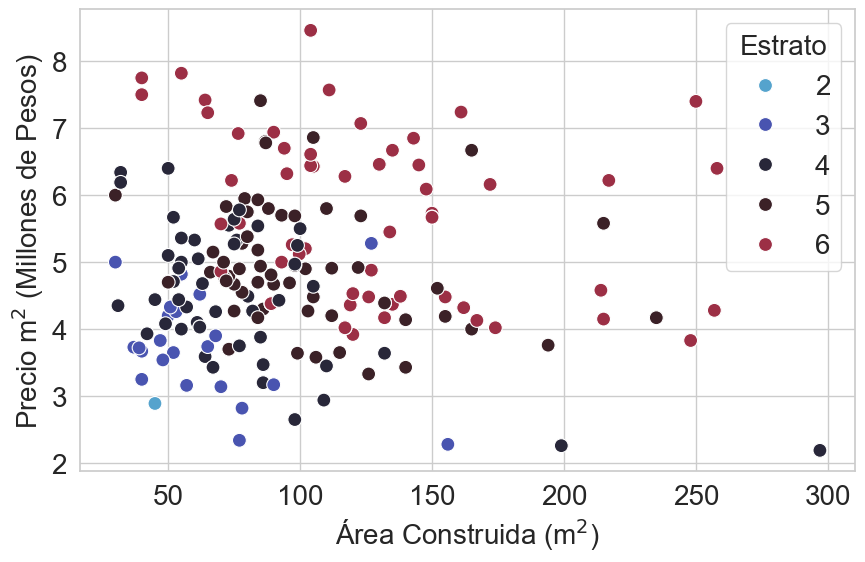

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Area construida (m2)", y="Precio m2", hue="Estrato", palette=sns.color_palette("icefire"), s=100)

plt.xlabel('Área Construida (m$^2$)', fontsize=20)
plt.ylabel('Precio m$^2$ (Millones de Pesos)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

legend = plt.legend(title="Estrato", fontsize=20)
plt.setp(legend.get_title(), fontsize=20)

c:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: U

<Figure size 1000x1000 with 0 Axes>

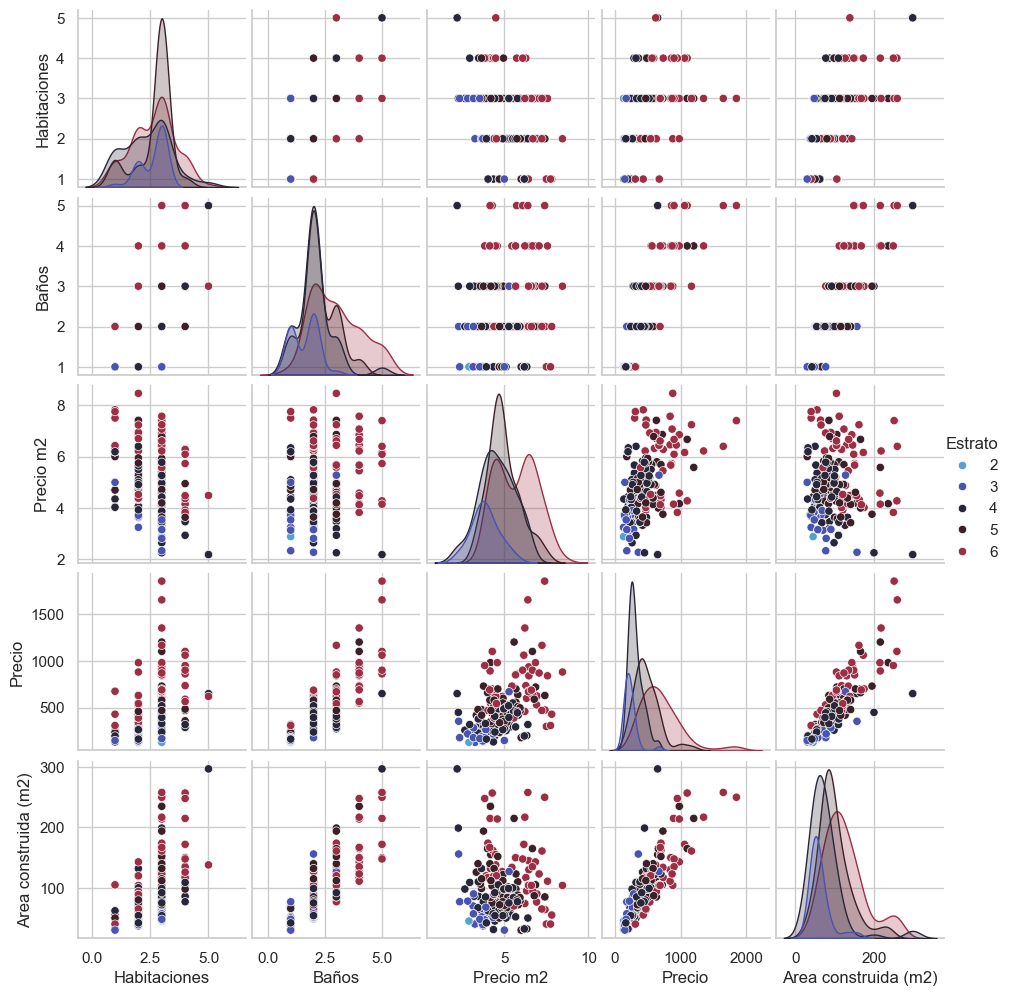

In [35]:
plt.figure(figsize=(10,10))
p = sns.pairplot(data=df, hue="Estrato", palette=sns.color_palette("icefire"))
p.figure.set_size_inches(10,10)

interval columns not set, guessing: ['Habitaciones', 'Baños', 'Estrato', 'Precio m2', 'Precio', 'Area construida (m2)']


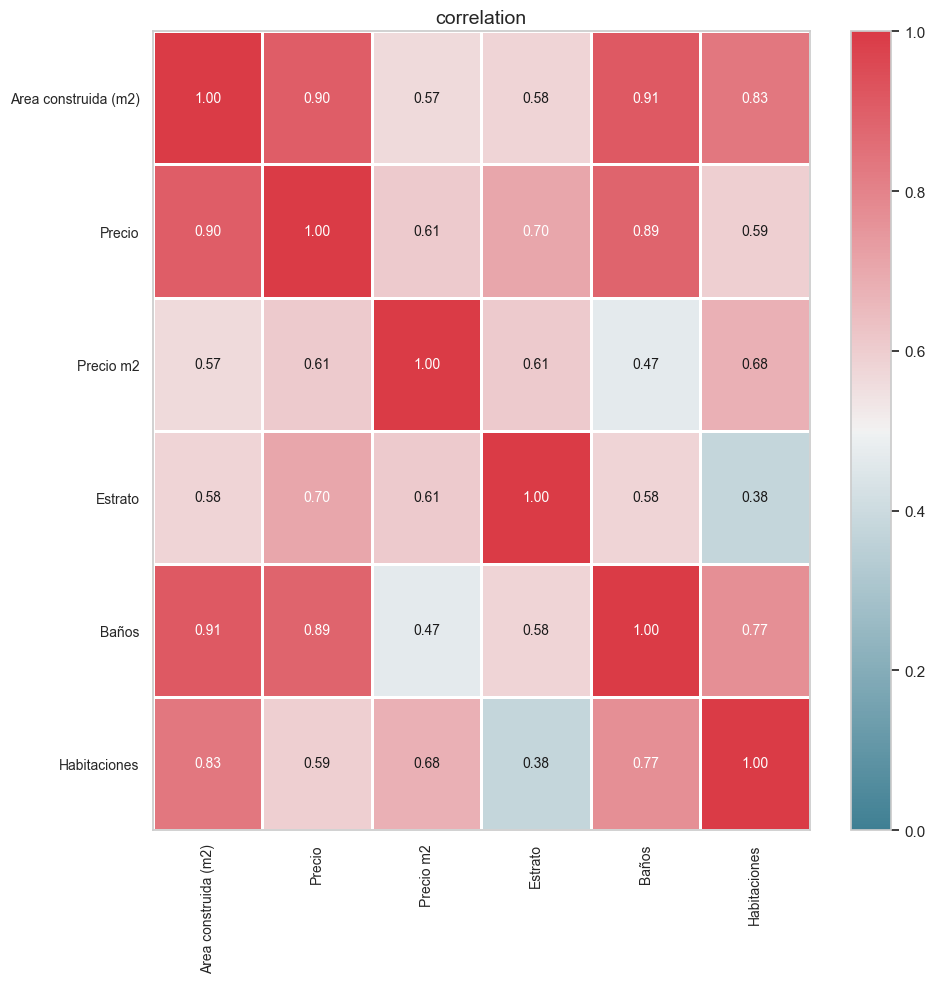

In [36]:
import phik
from phik import resources
from phik.binning import bin_data
from phik.decorators import *
from phik.report import plot_correlation_matrix

coerr_mat = df.phik_matrix()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plot_correlation_matrix(coerr_mat.values, x_labels=coerr_mat.columns, y_labels=coerr_mat.index, vmin=0, vmax=1, color_map=cmap, figsize=(10, 10))

In [37]:
df_stats = df.groupby("Estrato")[["Precio m2", "Precio", "Area construida (m2)"]].describe()
display(df_stats)

Precio m2                                                        \
            count      mean       std   min    25%    50%     75%   max   
Estrato                                                                   
2             1.0  2.890000       NaN  2.89  2.890  2.890  2.8900  2.89   
3            28.0  3.852143  0.815454  2.28  3.230  3.785  4.2775  5.67   
4            71.0  4.541268  1.050258  2.19  3.965  4.440  5.3300  6.40   
5            75.0  4.934000  0.936817  3.33  4.345  4.700  5.6350  7.41   
6            82.0  5.710854  1.190380  3.83  4.500  5.700  6.4600  8.46   

        Precio              ...                Area construida (m2)  \
         count        mean  ...    75%     max                count   
Estrato                     ...                                       
2          1.0  130.000000  ...  130.0   130.0                  1.0   
3         28.0  227.821429  ...  265.0   670.0                 28.0   
4         71.0  309.528169  ...  370.0   650.0                 71.0   
5         75.0  475.920000  ...  580.0  1200.0                 75.0   
6         82.0  692.953659  ...  850.0  1850.0                 82.0   

                                                                    
               mean        std   min    25%     50%     75%    max  
Estrato                                                             
2         45.000000        NaN  45.0  45.00   45.00   45.00   45.0  
3         60.708214  26.699317  30.0  47.00   52.50   65.75  156.0  
4         74.997887  47.085475  31.0  54.00   62.00   85.50  297.0  
5         98.200000  41.108240  30.0  75.00   86.78  112.00  235.0  
6        123.780488  52.374645  40.0  89.25  114.00  149.45  258.0  

[5 rows x 24 columns]

In [38]:
df_stats["Precio m2"]

,count,mean,std,min,25%,50%,75%,max
Estrato,,,,,,,,
2,1.0,2.890000,NaN,2.89,2.890,2.890,2.8900,2.89
3,28.0,3.852143,0.815454,2.28,3.230,3.785,4.2775,5.67
4,71.0,4.541268,1.050258,2.19,3.965,4.440,5.3300,6.40
5,75.0,4.934000,0.936817,3.33,4.345,4.700,5.6350,7.41
6,82.0,5.710854,1.190380,3.83,4.500,5.700,6.4600,8.46


(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6')])

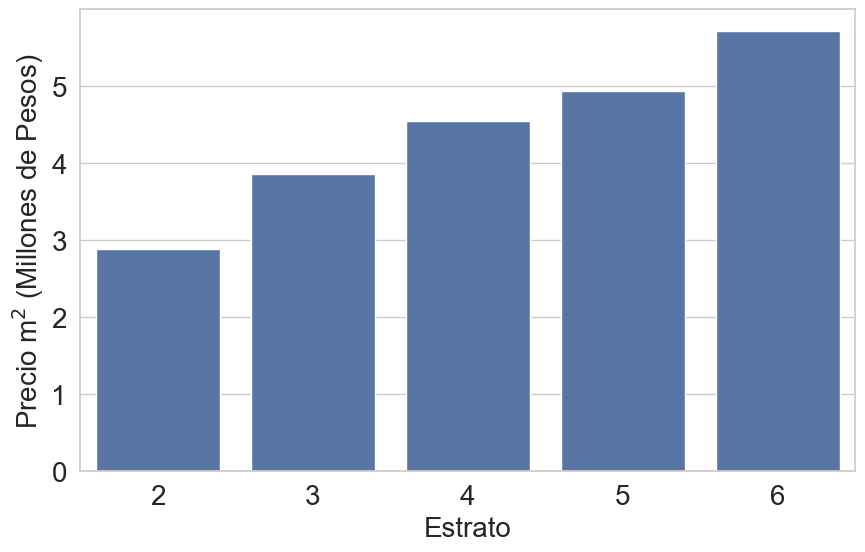

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_stats["Precio m2"], x="Estrato", y="mean")

plt.xlabel('Estrato', fontsize=20)
plt.ylabel('Precio m$^2$ (Millones de Pesos)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

C:\Users\alejo\AppData\Local\Temp\ipykernel_9276\3627024826.py:1: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.displot(data=df, x="Precio m2", hue="Estrato", kind="kde", fill=True, palette=sns.color_palette("icefire"), legend=False, aspect=1.2)
C:\Users\alejo\AppData\Local\Temp\ipykernel_9276\3627024826.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x="Precio m2", hue="Estrato", kind="kde", fill=True, palette=sns.color_palette("icefire"), legend=False, aspect=1.2)


[None]

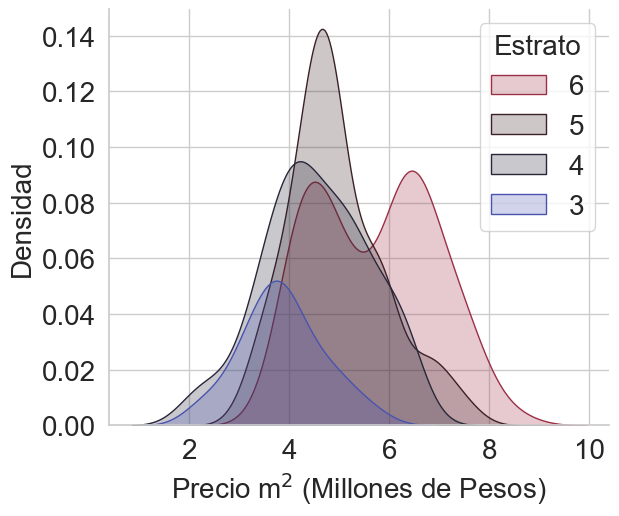

In [109]:
sns.displot(data=df, x="Precio m2", hue="Estrato", kind="kde", fill=True, palette=sns.color_palette("icefire"), legend=False, aspect=1.2)

plt.xlabel('Precio m$^2$ (Millones de Pesos)', fontsize=20)
plt.ylabel('Densidad', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

legend = plt.legend([6,5,4,3], title="Estrato", fontsize=20)
plt.setp(legend.get_title(), fontsize=20)

In [40]:
estrato_dfs = []

for estrato in range(3,7):
    estrato_dfs.append(df[df["Estrato"] == estrato])

display(estrato_dfs[1])

,Habitaciones,Baños,Estrato,Precio m2,Precio,Area construida (m2)
12,2.0,2.0,3,4.82,265.0,55.00
38,3.0,2.0,3,4.20,210.0,50.00
53,3.0,2.0,3,4.20,210.0,50.00
85,2.0,2.0,3,4.82,265.0,55.00
123,2.0,2.0,3,5.67,295.0,52.00
125,3.0,1.0,3,3.74,243.0,65.00
136,2.0,1.0,3,3.25,130.0,40.00
150,3.0,2.0,3,4.26,226.0,53.00
151,3.0,2.0,3,4.52,280.0,62.00
159,3.0,2.0,3,2.28,355.0,156.00


In [41]:
from sklearn.linear_model import LinearRegression

C:\Users\alejo\AppData\Local\Temp\ipykernel_9276\3878732256.py:13: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(data=df, x="Area construida (m2)", y="Precio", hue="Estrato", palette=sns.color_palette("icefire"), alpha=0.2, legend=None)


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500'),
  Text(0, 1750.0, '1750'),
  Text(0, 2000.0, '2000')])

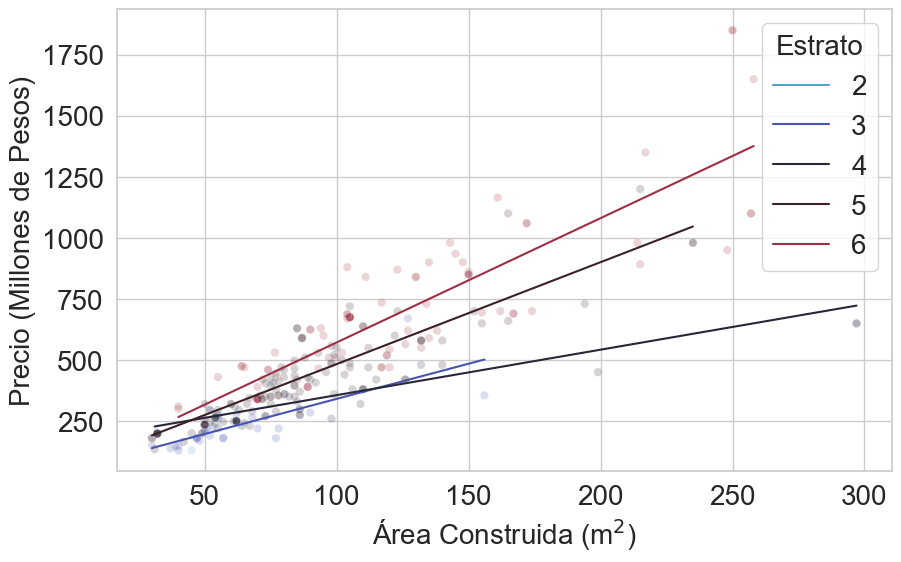

In [61]:
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette("icefire"))

for e in estrato_dfs:

    regressor = LinearRegression()
    regressor.fit(e["Area construida (m2)"].values.reshape((-1,1)), e["Precio"].values.reshape((-1,1)))

    p = regressor.predict(e["Area construida (m2)"].values.reshape((-1,1)))

    sns.lineplot(x=e["Area construida (m2)"].values.reshape((-1,)), y=p.reshape((-1,)), label=e["Estrato"].values[0])

sns.scatterplot(data=df, x="Area construida (m2)", y="Precio", hue="Estrato", palette=sns.color_palette("icefire"), alpha=0.2, legend=None)

legend = plt.legend(title="Estrato", fontsize=20)
plt.setp(legend.get_title(), fontsize=20)

plt.xlabel('Área Construida (m$^2$)', fontsize=20)
plt.ylabel('Precio (Millones de Pesos)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [44]:
import geopandas

In [45]:
file = open("medellin.geojson")
gdf = geopandas.read_file(file)

gdf = gdf[gdf["IDENTIFICACION"].str.contains("Comuna", na=False)]

display(gdf)

,OBJECTID,CODIGO,NOMBRE,IDENTIFICACION,LIMITEMUNICIPIOID,SUBTIPO_COMUNACORREGIMIENTO,LINK_DOCUMENTO,SHAPEAREA,SHAPELEN,geometry
0,321,01,Popular,Comuna 1,001,1,None,3.098290e+06,9604.987826,"POLYGON ((-75.54803 6.30436, -75.54812 6.30435..."
1,322,02,Santa Cruz,Comuna 2,001,1,None,2.195875e+06,8597.714449,"POLYGON ((-75.55703 6.31007, -75.55707 6.31011..."
2,323,03,Manrique,Comuna 3,001,1,None,5.096746e+06,12078.237108,"POLYGON ((-75.54252 6.28632, -75.54254 6.28633..."
3,324,04,Aranjuez,Comuna 4,001,1,None,4.883731e+06,9643.089265,"POLYGON ((-75.56229 6.29126, -75.56229 6.29126..."
4,325,05,Castilla,Comuna 5,001,1,None,6.064367e+06,16098.614898,"POLYGON ((-75.56566 6.31261, -75.56573 6.31263..."
5,326,06,Doce de Octubre,Comuna 6,001,1,None,3.850036e+06,10710.152086,"POLYGON ((-75.57586 6.31093, -75.57588 6.31094..."
6,327,07,Robledo,Comuna 7,001,1,None,9.462363e+06,23265.616002,"POLYGON ((-75.5905 6.29592, -75.5905 6.29593, ..."
7,328,08,Villa Hermosa,Comuna 8,001,1,None,5.717609e+06,16393.810590,"POLYGON ((-75.55077 6.26237, -75.55079 6.26237..."
8,329,09,Buenos Aires,Comuna 9,001,1,None,6.053265e+06,18365.849130,"POLYGON ((-75.55502 6.24505, -75.55503 6.24507..."
9,330,10,La Candelaria,Comuna 10,001,1,None,7.361364e+06,13633.225294,"POLYGON ((-75.56426 6.26394, -75.56465 6.264, ..."


<Axes: >

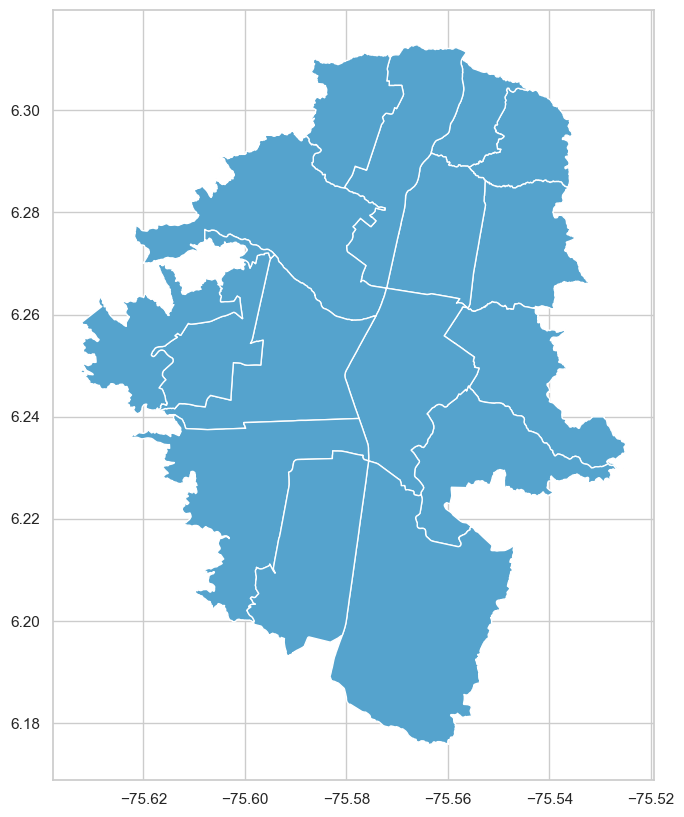

In [46]:
gdf.plot(figsize=(10,10))

In [47]:
file = open("estrato_socioeconomico.geojson")
gdf_estrato = geopandas.read_file(file)

gdf_estrato = gdf_estrato[gdf_estrato["comuna"].astype(int) < 17]

display(gdf_estrato)

,OBJECTID,comuna,barrio,codigo_barrio,manzana,estrato,fecha_sincronizacion,Shape_Length,Shape_Area,geometry
0,1,11,06,1106,None,5,1713838502000,3543.992871,25918.292272,"POLYGON ((4713614.148 2248705.974, 4713602.354..."
1,2,13,01,1301,None,1,1713838502000,14338.287834,40471.154025,"MULTIPOLYGON (((4712289.617 2251676.801, 47122..."
2,3,05,12,0512,None,2,1713838502000,7041.723095,76352.829107,"MULTIPOLYGON (((4715957.97 2253328.743, 471595..."
3,4,10,17,1017,None,4,1713838502000,11388.742621,72188.709269,"MULTIPOLYGON (((4717067.379 2249437.395, 47170..."
4,5,04,11,0411,None,3,1713838502000,7092.678106,41182.817296,"MULTIPOLYGON (((4717247.833 2252285.007, 47172..."
...,...,...,...,...,...,...,...,...,...,...
29398,29399,14,15,1415,1415015,6,1713838502000,158.313520,263.191939,"POLYGON ((4715531.801 2243147.913, 4715534.232..."
29399,29400,14,15,1415,1415015,6,1713838502000,617.139639,16405.628968,"POLYGON ((4715582.417 2243228.557, 4715590.333..."
29400,29401,14,15,1415,1415016,6,1713838502000,788.622805,22170.772838,"POLYGON ((4715844.037 2243409.617, 4715844.001..."
29401,29402,14,15,1415,1415999,6,1713838502000,41.631554,54.299263,"POLYGON ((4715896.405 2242909.856, 4715897.065..."


<Axes: >

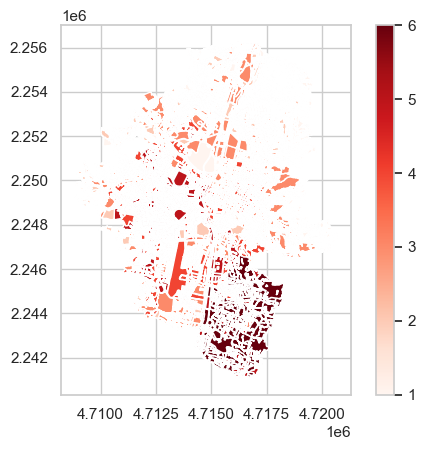

In [48]:
gdf_estrato.plot(column="estrato", cmap="Reds", legend=True)

In [49]:
## Check maps coordinate reference system (CRS)
print(gdf.crs)
print(gdf_estrato.crs)

EPSG:4326
EPSG:9377


In [50]:
## Reproject one map into the other one
if gdf.crs != gdf_estrato.crs: 
    gdf_estrato = gdf_estrato.to_crs(gdf.crs)

In [51]:
## Check maps coordinate reference system (CRS) to ensure they are the same
print(gdf.crs)
print(gdf_estrato.crs)

EPSG:4326
EPSG:4326


C:\Users\alejo\AppData\Local\Temp\ipykernel_9276\2647089768.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['CODIGO']):


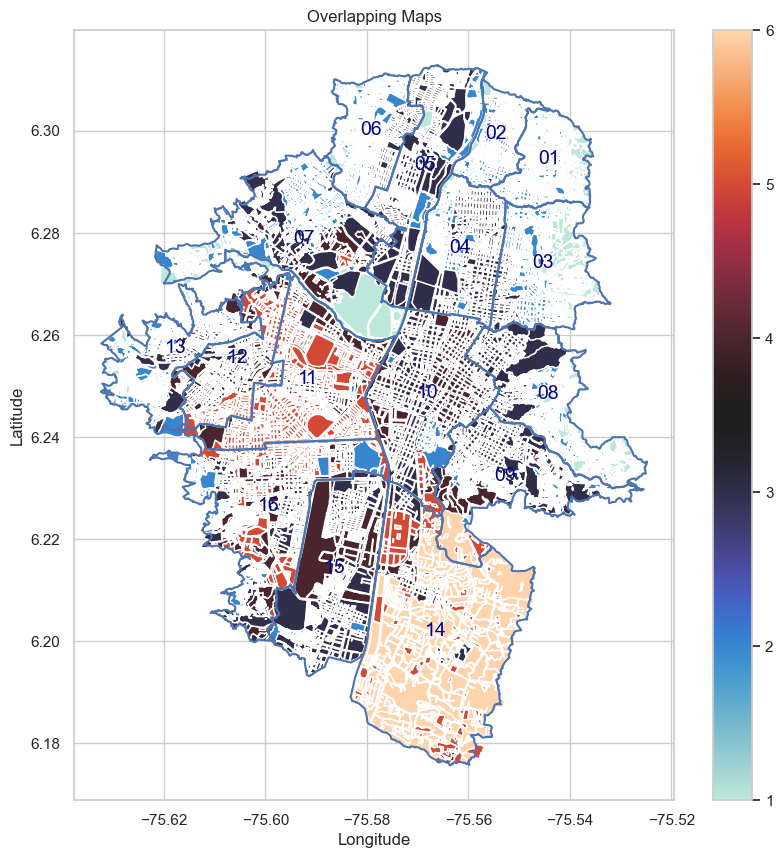

In [63]:
# Step 3: Plot the Overlapping Maps
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the first map
gdf.boundary.plot(ax=ax, color='b', alpha=1)

for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['CODIGO']): 
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=14, color="darkblue", ha="center")

# Plot the second map
gdf_estrato.plot(ax=ax, column="estrato", cmap="OrRd", legend=True, alpha=1)


plt.title('Overlapping Maps')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [53]:
average_price_df = pd.DataFrame(data={
    "estrato": df_stats.index.values,
    "Precio Promedio m2": df_stats["Precio m2"]["mean"].values
})

display(average_price_df)

,estrato,Precio Promedio m2
0,2,2.890000
1,3,3.852143
2,4,4.541268
3,5,4.934000
4,6,5.710854


In [54]:
merged_gdf = pd.merge(left=gdf_estrato, right=average_price_df, on="estrato", how="left")
display(merged_gdf)

,OBJECTID,comuna,barrio,codigo_barrio,manzana,estrato,fecha_sincronizacion,Shape_Length,Shape_Area,geometry,Precio Promedio m2
0,1,11,06,1106,None,5,1713838502000,3543.992871,25918.292272,"POLYGON ((-75.58911 6.24447, -75.58921 6.24449...",4.934000
1,2,13,01,1301,None,1,1713838502000,14338.287834,40471.154025,"MULTIPOLYGON (((-75.6012 6.27126, -75.60119 6....",NaN
2,3,05,12,0512,None,2,1713838502000,7041.723095,76352.829107,"MULTIPOLYGON (((-75.56814 6.28636, -75.56813 6...",2.890000
3,4,10,17,1017,None,4,1713838502000,11388.742621,72188.709269,"MULTIPOLYGON (((-75.55794 6.25123, -75.55795 6...",4.541268
4,5,04,11,0411,None,3,1713838502000,7092.678106,41182.817296,"MULTIPOLYGON (((-75.55643 6.27698, -75.55643 6...",3.852143
...,...,...,...,...,...,...,...,...,...,...,...
27185,29399,14,15,1415,1415015,6,1713838502000,158.313520,263.191939,"POLYGON ((-75.57154 6.1943, -75.57151 6.19434,...",5.710854
27186,29400,14,15,1415,1415015,6,1713838502000,617.139639,16405.628968,"POLYGON ((-75.57108 6.19503, -75.57101 6.19514...",5.710854
27187,29401,14,15,1415,1415016,6,1713838502000,788.622805,22170.772838,"POLYGON ((-75.56873 6.19668, -75.56873 6.19669...",5.710854
27188,29402,14,15,1415,1415999,6,1713838502000,41.631554,54.299263,"POLYGON ((-75.56823 6.19217, -75.56823 6.19218...",5.710854


C:\Users\alejo\AppData\Local\Temp\ipykernel_9276\3216771144.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['CODIGO']):


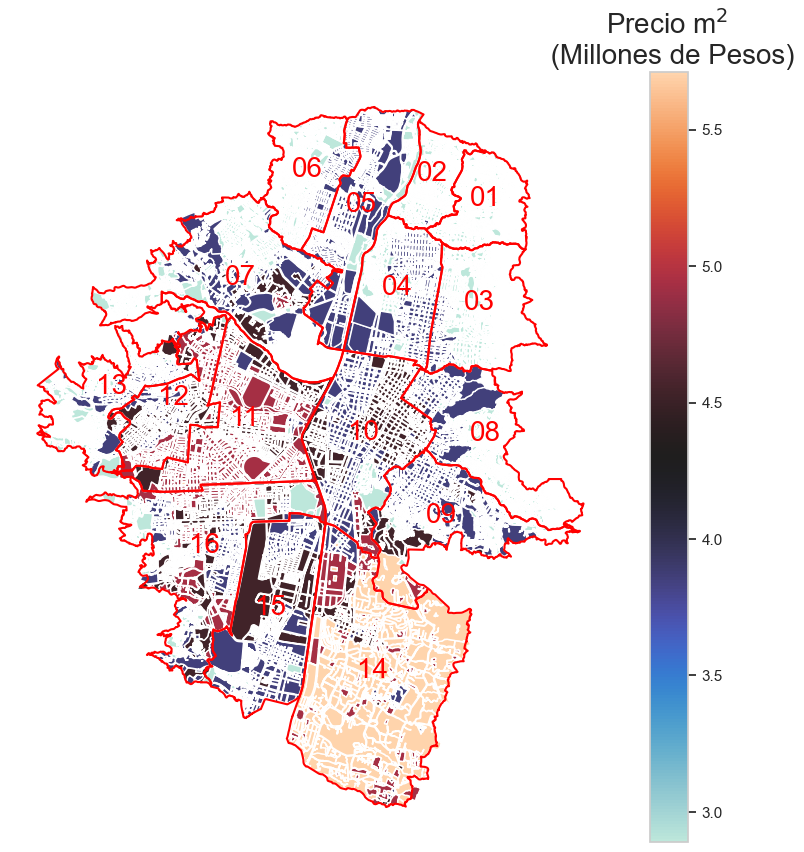

In [110]:
# Step 3: Plot the Overlapping Maps
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

## Plot the first map
gdf.boundary.plot(ax=ax, color='red', alpha=1)

## Add labels to boundaries
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['CODIGO']): 
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=20, color="red", ha="center")

## Plot the second map
merged_gdf.plot(ax=ax, column="Precio Promedio m2", cmap="icefire", legend=True, alpha=1)

ax.axis("off")
ax.grid(False)

cbar = ax.get_figure().get_axes()[1] 
cbar.set_title('Precio m$^2$ \n (Millones de Pesos)', fontsize=20)

## Trasparent Background
#fig.patch.set_alpha(0.0)
#ax.patch.set_alpha(0.0)

plt.show()